# Exploratory Data Analysis for Retail Store

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [2]:
data = pd.read_csv('data/retail_cleaned_data.csv')

In [3]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
805544,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
805545,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
805546,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60
805547,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85


<Axes: xlabel='Description'>

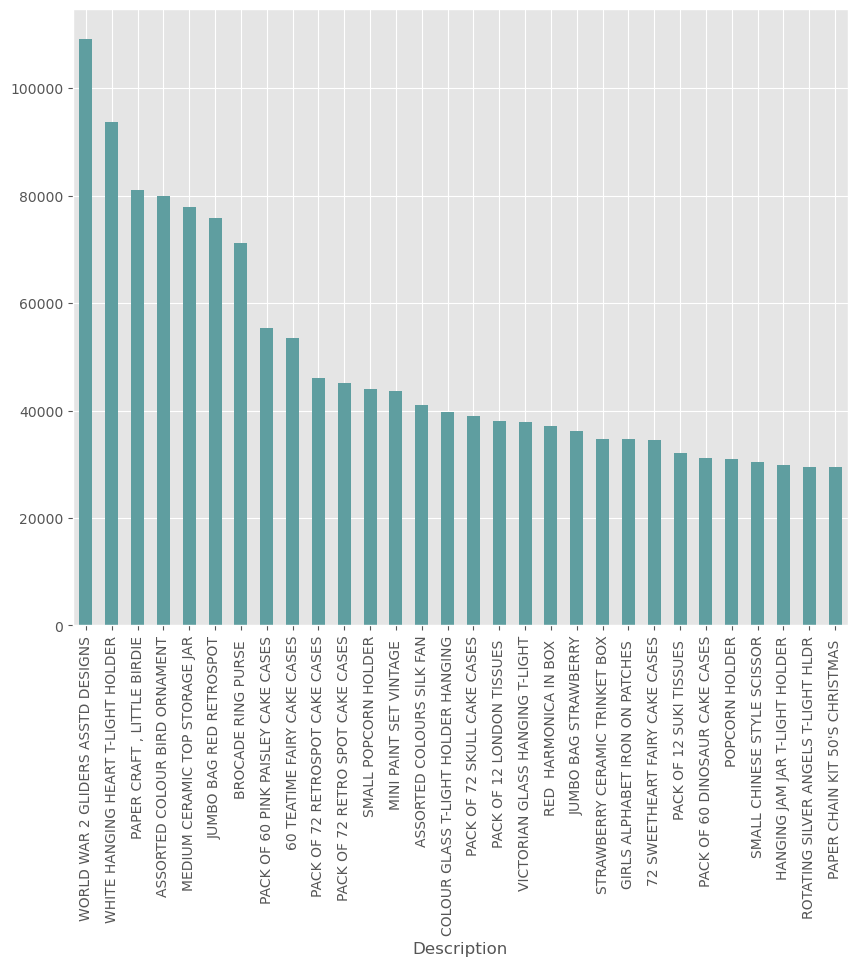

In [4]:
#Product that has been purchased more often so far
plt.figure(figsize=(10,8))
data.groupby("Description").sum().sort_values(by = "Quantity", ascending = False).head(30)["Quantity"].plot(kind = "bar", color = 'cadetblue')

In [5]:
temp_data = data.copy()

In [6]:
temp_data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
805544,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
805545,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
805546,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60
805547,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85


In [7]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [8]:
#Date Time Analysis
temp_data.loc[:, "Month"] = data['InvoiceDate'].dt.month
temp_data.loc[:, "Time"] = data.InvoiceDate.dt.time
temp_data.loc[:, "Year"] = data.InvoiceDate.dt.year
temp_data.loc[:, "Day"] = data.InvoiceDate.dt.day
temp_data.loc[:, "Quarter"] = data.InvoiceDate.dt.quarter
temp_data.loc[:, "Day of Week"] = data.InvoiceDate.dt.dayofweek

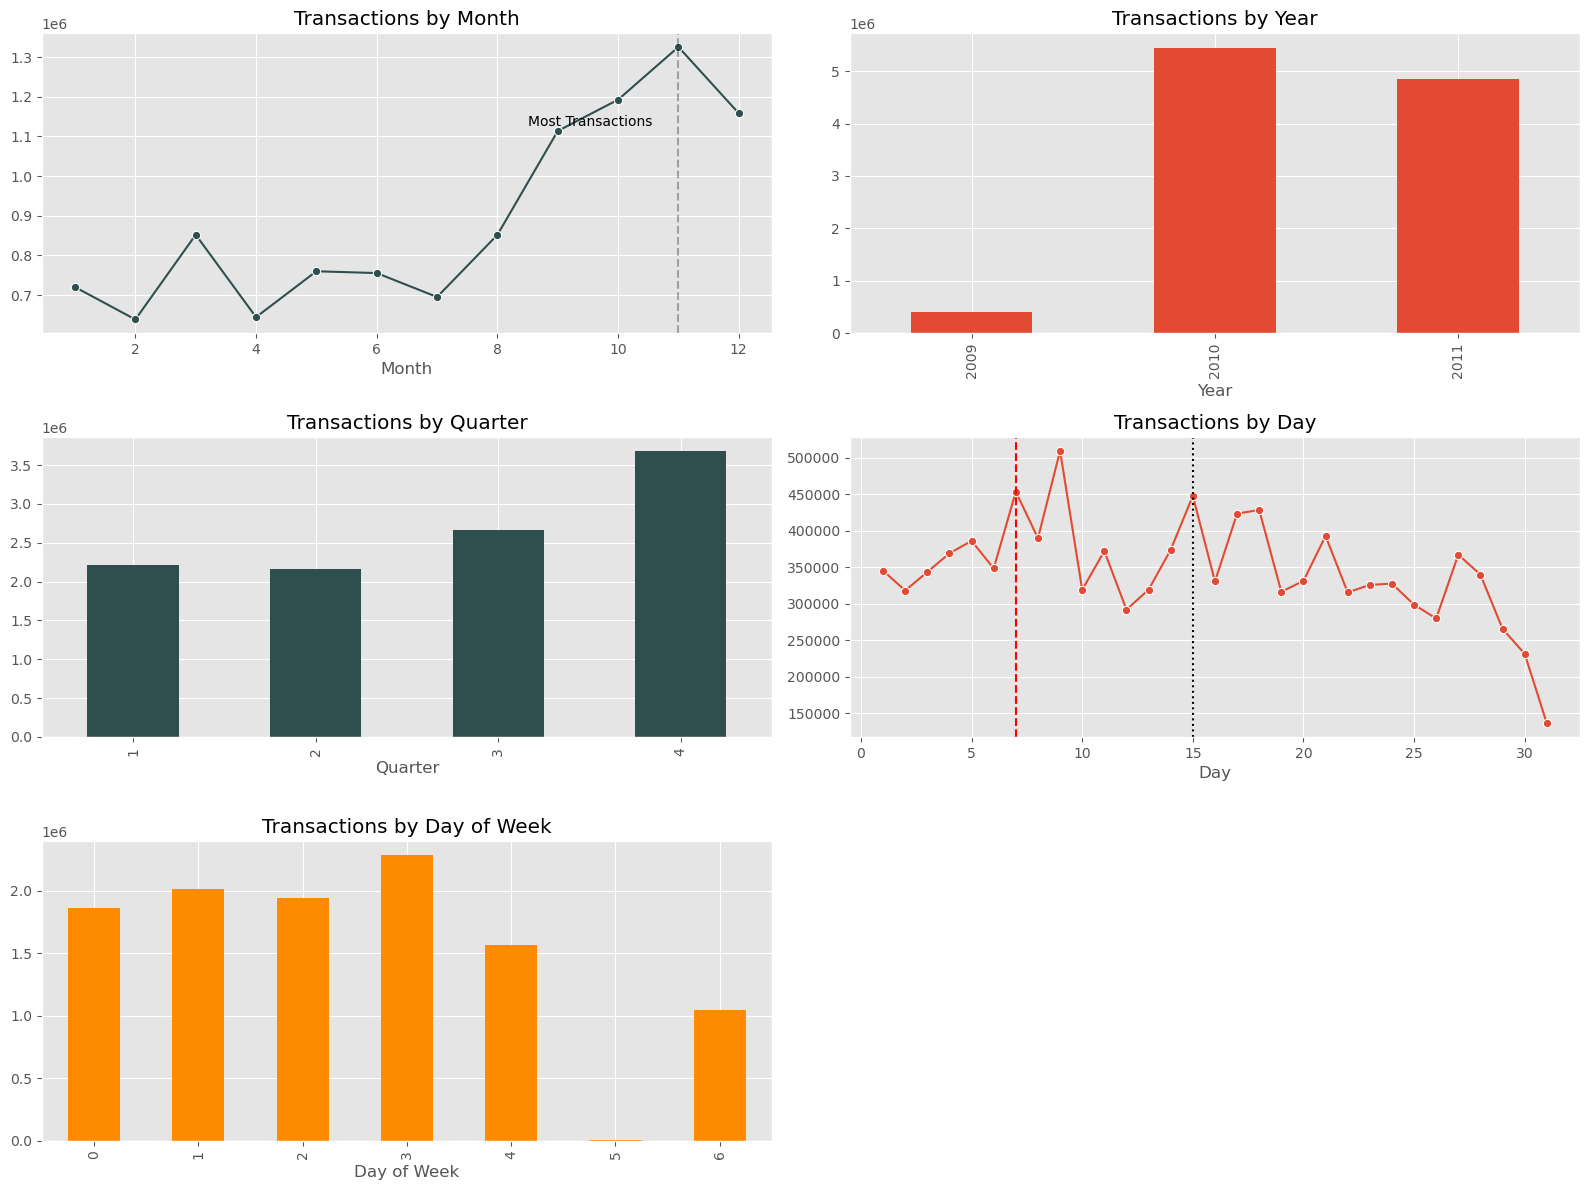

In [9]:
# Transaction analysis based on Day,Week,Month,Quater and Year

monthly_qty = temp_data.groupby("Month")["Quantity"].sum()
yearly_qty = temp_data.groupby("Year")["Quantity"].sum()
quarterly_qty = temp_data.groupby("Quarter")["Quantity"].sum()
daily_qty = temp_data.groupby("Day")["Quantity"].sum()
weekday_qty = temp_data.groupby("Day of Week")["Quantity"].sum()

plt.figure(figsize=(16, 12))

# 1. Transactions by Month
plt.subplot(3, 2, 1)
sns.lineplot(x=monthly_qty.index, y=monthly_qty.values, marker="o", color="darkslategray")
plt.axvline(11, color="k", linestyle='--', alpha=0.3)
plt.text(8.5, monthly_qty.max() * 0.85, "Most Transactions")
plt.title("Transactions by Month")

# 2. Transactions by Year
plt.subplot(3, 2, 2)
yearly_qty.plot(kind="bar")
plt.title("Transactions by Year")

# 3. Transactions by Quarter
plt.subplot(3, 2, 3)
quarterly_qty.plot(kind="bar", color="darkslategrey")
plt.title("Transactions by Quarter")

# 4. Transactions by Day
plt.subplot(3, 2, 4)
sns.lineplot(x=daily_qty.index, y=daily_qty.values, marker="o")
plt.axvline(7, color='r', linestyle='--')
plt.axvline(15, color='k', linestyle='dotted')
plt.title("Transactions by Day")

# 5. Transactions by Day of Week
plt.subplot(3, 2, 5)
weekday_qty.plot(kind="bar", color="darkorange")
plt.title("Transactions by Day of Week")

plt.tight_layout()
plt.show()


#### As we can see, in 2009 the transactions is quite low as compared to 2010 and 2011. But as if now, we don't know the reason behind this so let's investigate why 2009 is low as compared to other 2 years.

In [10]:
print("Total Number of Countries in 2009: {}".format(len(temp_data[temp_data["Year"] == 2009]["Country"].unique())))
print("Total Number of Transactions in 2009: {}".format(temp_data[temp_data["Year"] == 2009]["Quantity"].sum()))
print("--------------------------------------------")
print("Total Number of Countries in 2010: {}".format(len(temp_data[temp_data["Year"] == 2010]["Country"].unique())))
print("Total Number of Transactions in 2010: {}".format(temp_data[temp_data["Year"] == 2010]["Quantity"].sum()))
print("--------------------------------------------")
print("Total Number of Countries in 2011: {}".format(len(temp_data[temp_data["Year"] == 2011]["Country"].unique())))
print("Total Number of Transactions in 2011: {}".format(temp_data[temp_data["Year"] == 2011]["Quantity"].sum()))

Total Number of Countries in 2009: 22
Total Number of Transactions in 2009: 400153
--------------------------------------------
Total Number of Countries in 2010: 37
Total Number of Transactions in 2010: 5450466
--------------------------------------------
Total Number of Countries in 2011: 36
Total Number of Transactions in 2011: 4855548


#### Through this analysis what conclusion we can make is that may be the company has started their operations in other countries and started to expand their business further.

In [16]:
temp = data.groupby(["Country", "Description"])["Quantity"].sum()


In [17]:
temp = pd.DataFrame(temp)

In [18]:
top_8_countries = ["United Kingdom", "Netherlands", "EIRE", "Denmark", "Germany", "France", "Australia", "Sweden"]

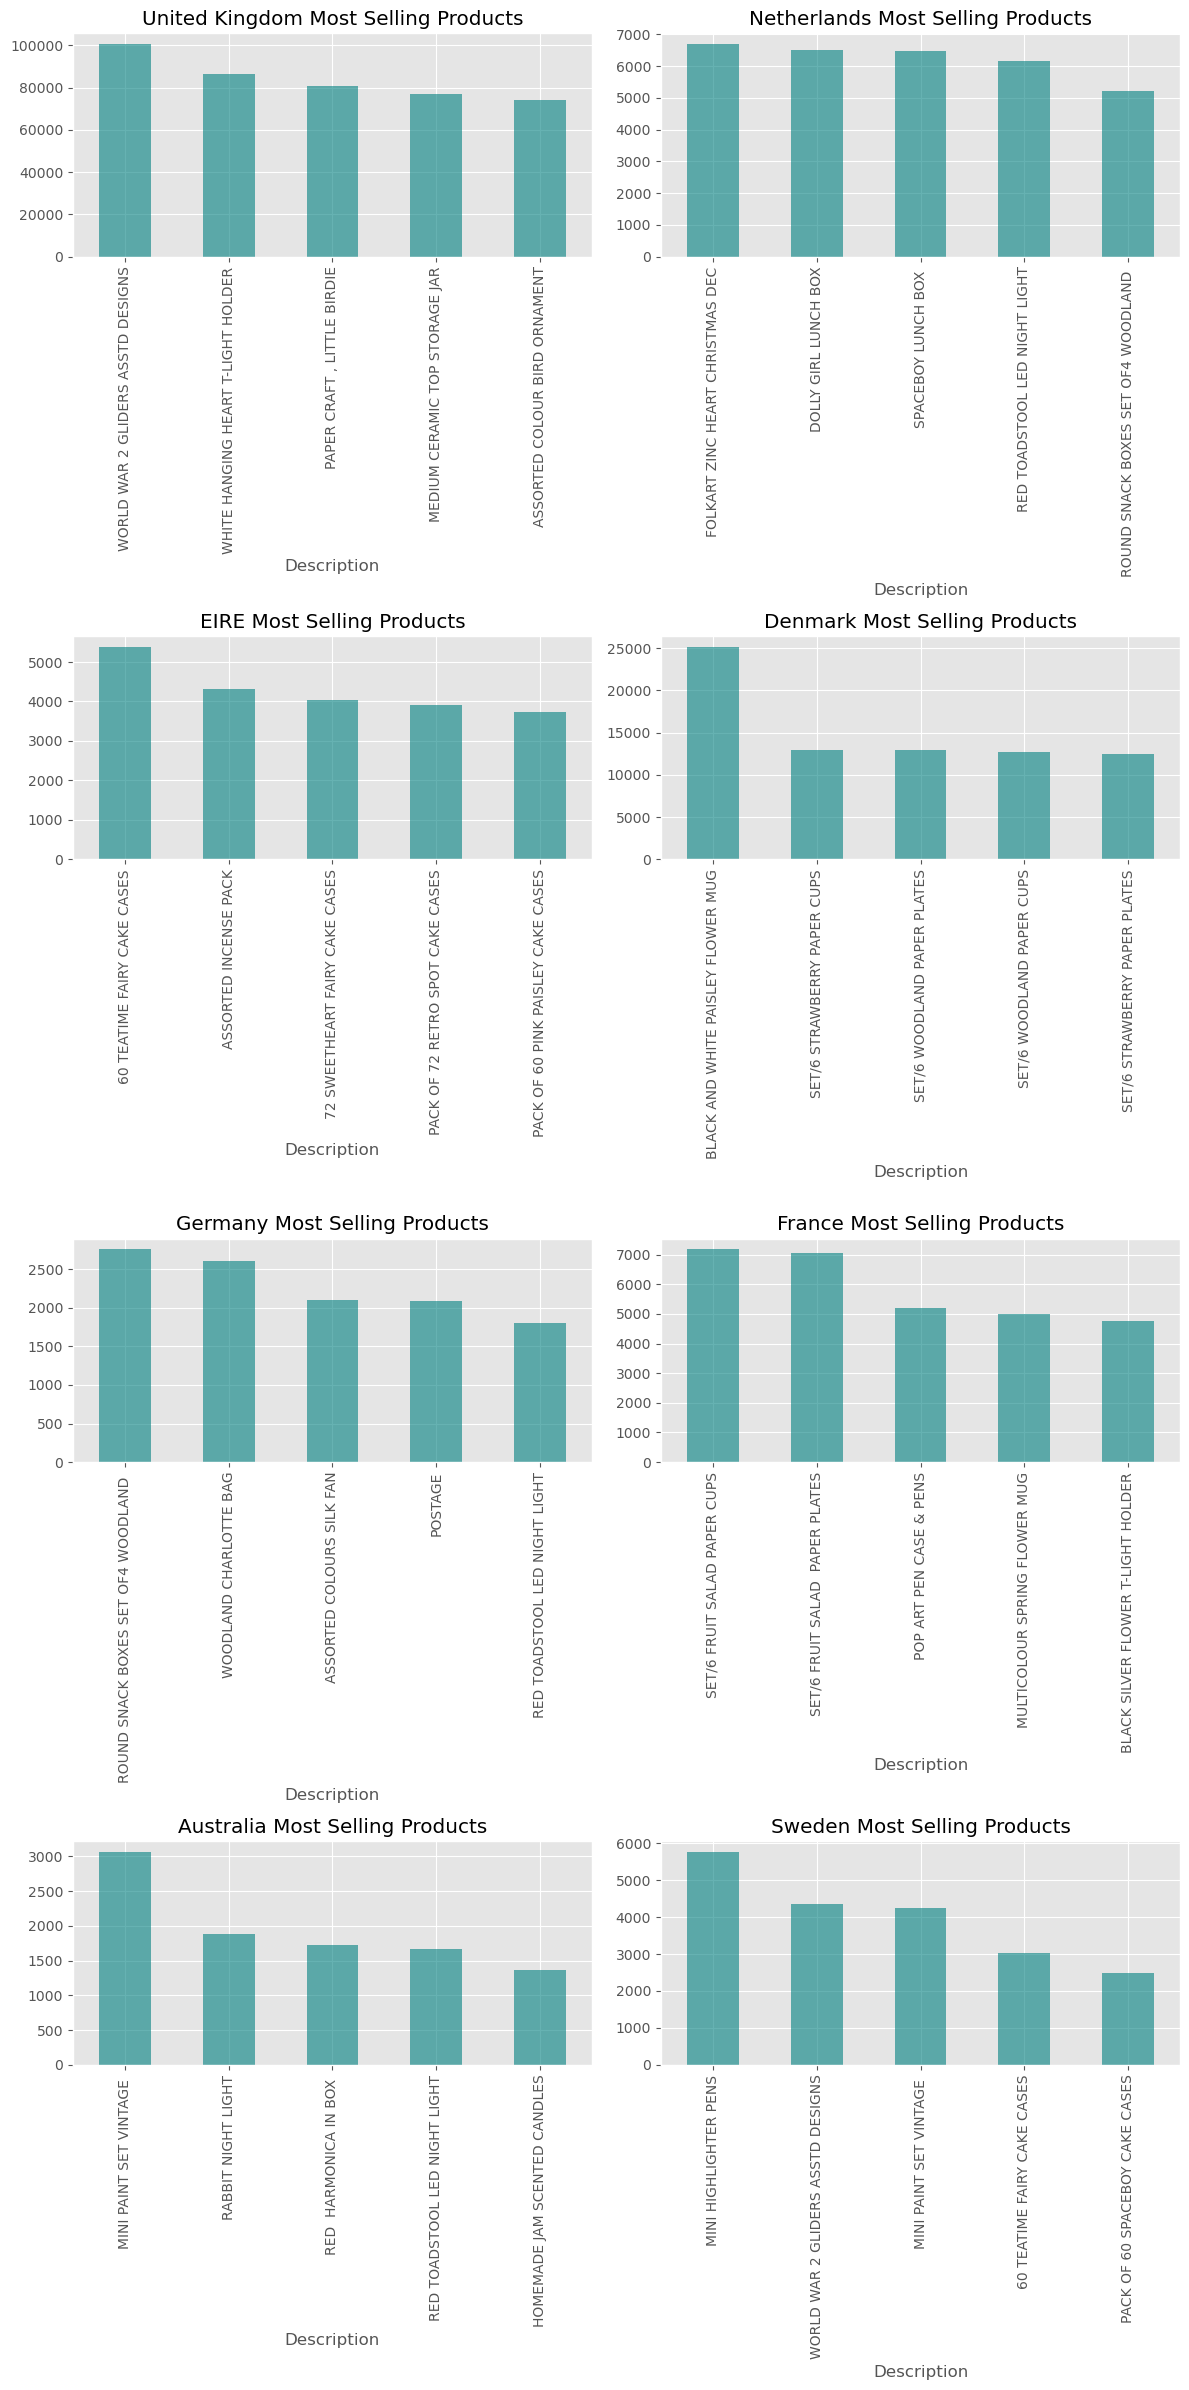

In [19]:
x = 1
plt.figure(figsize=(12,24))
for x, c in enumerate(top_8_countries):
    ax = plt.subplot(4,2, x+1)
    plt.title(c + ' '+ "Most Selling Products")
    temp.loc[c].sort_values(by = "Quantity", ascending = False)["Quantity"].head(5).plot(kind = "bar", ax = ax, color = "teal", alpha = 0.6)
    plt.tight_layout()

### **EDA INSIGHTS:**


1) Our Top 5 Best Selling Products are **World War 2 Gliders**, **White Hanging Heart**, **Assorted Colour Bird**, **Jumbo Bag Red**, **Brocade Ring**.

2) Most Transactions happened in the month of Novemeber which is evident due to festive seasons.

3) 2010 is the year in which we have the most transactions followed by the 2011

4) Q4 being the highest when it comes transactions.

5) It also observed that in the end of the 1st week and starting of the 3rd week, people tends to buy more.

6) People loves to shop on Thursday followed by Tuesday and Wednesday.
